In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import make_circles

#%matplotlib notebook

seed = 4

In [18]:
def plotSamples(x1,x2,y,filename):
    idx0 = np.argwhere(y == 0)
    idx1 = np.argwhere(y == 1)

    plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
    plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)
    plt.legend()
    plt.savefig(filename, dpi=600)
    plt.show()
    
def plotDecisionBoundary(clf,x1,x2,filename):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x1.min() - .5, x1.max() + .5
    y_min, y_max = x2.min() - .5, x2.max() + .5
    h = 250
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h), np.linspace(y_min, y_max, h))

    zz = np.zeros((xx.shape))
    for i in range(0, len(xx)):
        for j in range(0, len(yy)):
            aux = clf.predict_proba(np.c_[xx[i,j], yy[i,j]])
            zz[i,j] = aux[0,1]

    ax = plt.subplot(1, 1, 1, projection='3d')
    ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm, linewidth=0, antialiased=True)
    # Add a color bar which maps values to colors.
    ax.set_xlabel('$x_1$',fontsize=14)
    ax.set_ylabel('$x_2$',fontsize=14)
    ax.set_zlabel('$y$',fontsize=14)
    plt.savefig(filename, dpi=600)
    plt.show()

# AND Function

In [19]:
# Number of examples.
N = 10000

np.random.seed(seed)
x1 = np.random.randint(0,2,N)
x2 = np.random.randint(0,2,N)

y = x1 & x2

np.random.seed(seed)
x1 = x1 + 0.1*np.random.randn(N,)
x2 = x2 + 0.1*np.random.randn(N,)

X = np.c_[x1,x2]

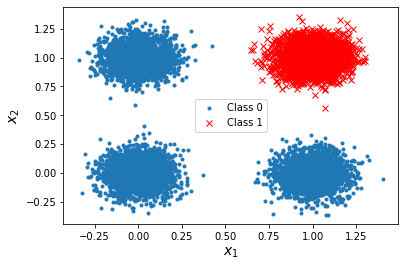

In [20]:
plotSamples(x1,x2,y,'and.png')

In [21]:
clf = MLPClassifier(activation='logistic', solver='lbfgs', max_iter=100000, hidden_layer_sizes=(), random_state=seed)
clf.fit(X, y)

y_pred = clf.predict(X)
        
error = mean_squared_error(y_pred, y)
print('MSE: ', error)

MSE:  0.0002


In [26]:
print('Output coeff shape: ', clf.coefs_[0].shape)
print('n_layers: ', clf.n_layers_)
print('n_iter: ', clf.n_iter_)

Output coeff shape:  (2, 1)
n_layers:  2
n_iter:  16


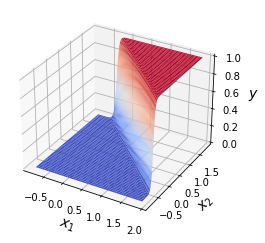

In [27]:
plotDecisionBoundary(clf,x1,x2,'mlp1.png')

# XOR Function

In [28]:
# Number of examples.
N = 10000

np.random.seed(seed)
x1 = np.random.randint(0,2,N)
x2 = np.random.randint(0,2,N)

y = x1 ^ x2

np.random.seed(seed)
x1 = x1 + 0.1*np.random.randn(N,)
x2 = x2 + 0.1*np.random.randn(N,)

X = np.c_[x1,x2]

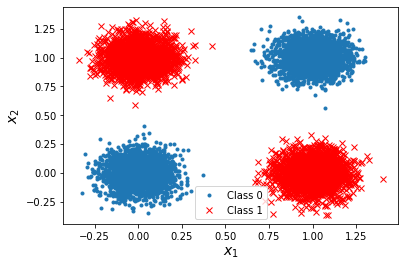

In [29]:
plotSamples(x1,x2,y,'xor.png')

In [33]:
clf1 = MLPClassifier(activation='logistic', solver='lbfgs', max_iter=1000, hidden_layer_sizes=(2,), random_state=seed)
clf1.fit(X, y)

y_pred = clf1.predict(X)
        
error = mean_squared_error(y_pred, y)
print('MSE: ', error)

MSE:  0.0004


In [34]:
print('Hidden coeff shape: ', clf1.coefs_[0].shape)
print('Output coeff shape: ', clf1.coefs_[1].shape)
print('n_layers: ', clf1.n_layers_)
print('n_iter: ', clf1.n_iter_)

Hidden coeff shape:  (2, 2)
Output coeff shape:  (2, 1)
n_layers:  3
n_iter:  35


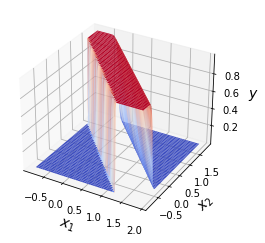

In [35]:
plotDecisionBoundary(clf1,x1,x2,'mlp21.png')

# Concentric Circles

In [43]:
X, y = make_circles(n_samples=1000, random_state=42, noise=0.1, factor=0.2)

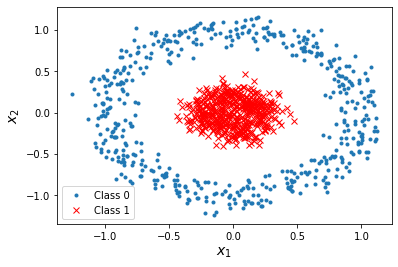

In [44]:
plotSamples(X[:,0],X[:,1],y,'concentriccircles.png')

In [49]:
clf2 = MLPClassifier(activation='logistic', solver='lbfgs', max_iter=1000, hidden_layer_sizes=(4,), random_state=seed)
clf2.fit(X, y)

y_pred = clf2.predict(X)
        
error = mean_squared_error(y_pred, y)
print('MSE: ', error)

MSE:  0.0


In [52]:
print('Hidden coeff shape: ', clf2.coefs_[0].shape)
print('Output coeff shape: ', clf2.coefs_[1].shape)
print('n_layers: ', clf2.n_layers_)
print('n_iter: ', clf2.n_iter_)

Hidden coeff shape:  (2, 4)
Output coeff shape:  (4, 1)
n_layers:  3
n_iter:  66


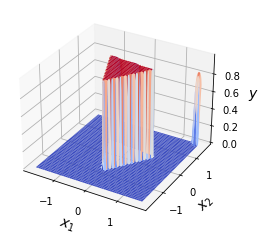

In [53]:
plotDecisionBoundary(clf2,X[:,0],X[:,1],'mlpcc.png')